<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
for link in soup.find_all('annual average salary'):# in html image is represented by the tag <img>
    print(link.get('src'))

In [6]:
table = soup.find('table')

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
obj = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language_name = cols[1].getText() 
    annual_average_salary = cols[3].getText() 
    print(language_name, ',', annual_average_salary)
    obj.append([language_name,annual_average_salary])

Language , Average Annual Salary
Python , $114,383
Java , $101,013
R , $92,037
Javascript , $110,981
Swift , $130,801
C++ , $113,865
C# , $88,726
PHP , $84,727
SQL , $84,793
Go , $94,082


In [8]:
obj

[['Language', 'Average Annual Salary'],
 ['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

In [9]:
import pandas as pd

In [10]:
csv = pd.DataFrame(obj)
csv.columns = csv.iloc[0]
csv=csv.drop(csv.index[0])
csv

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [11]:
csv.to_csv('popular-languages.csv')

In [15]:
df2= pd.read_csv('popular-languages.csv', index_col=[0])
#df2 = df2.drop('Unnamed: 0')
df2

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [17]:
df2[df2.columns[1:]] = df2[df2.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
df2

,Language,Average Annual Salary
1,Python,114383.0
2,Java,101013.0
3,R,92037.0
4,Javascript,110981.0
5,Swift,130801.0
6,C++,113865.0
7,C#,88726.0
8,PHP,84727.0
9,SQL,84793.0
10,Go,94082.0


<AxesSubplot:title={'center':'Average Annual Salary per Technology Use'}, xlabel='Language'>

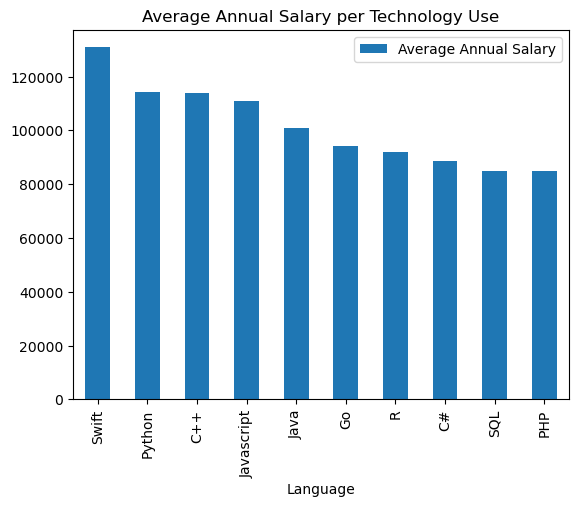

In [18]:
df2.sort_values(by='Average Annual Salary',ascending=False).plot(x='Language', y='Average Annual Salary', kind='bar', title = 'Average Annual Salary per Technology Use')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
